# 문제 1
- DFS와 BFS
- https://www.acmicpc.net/problem/1260

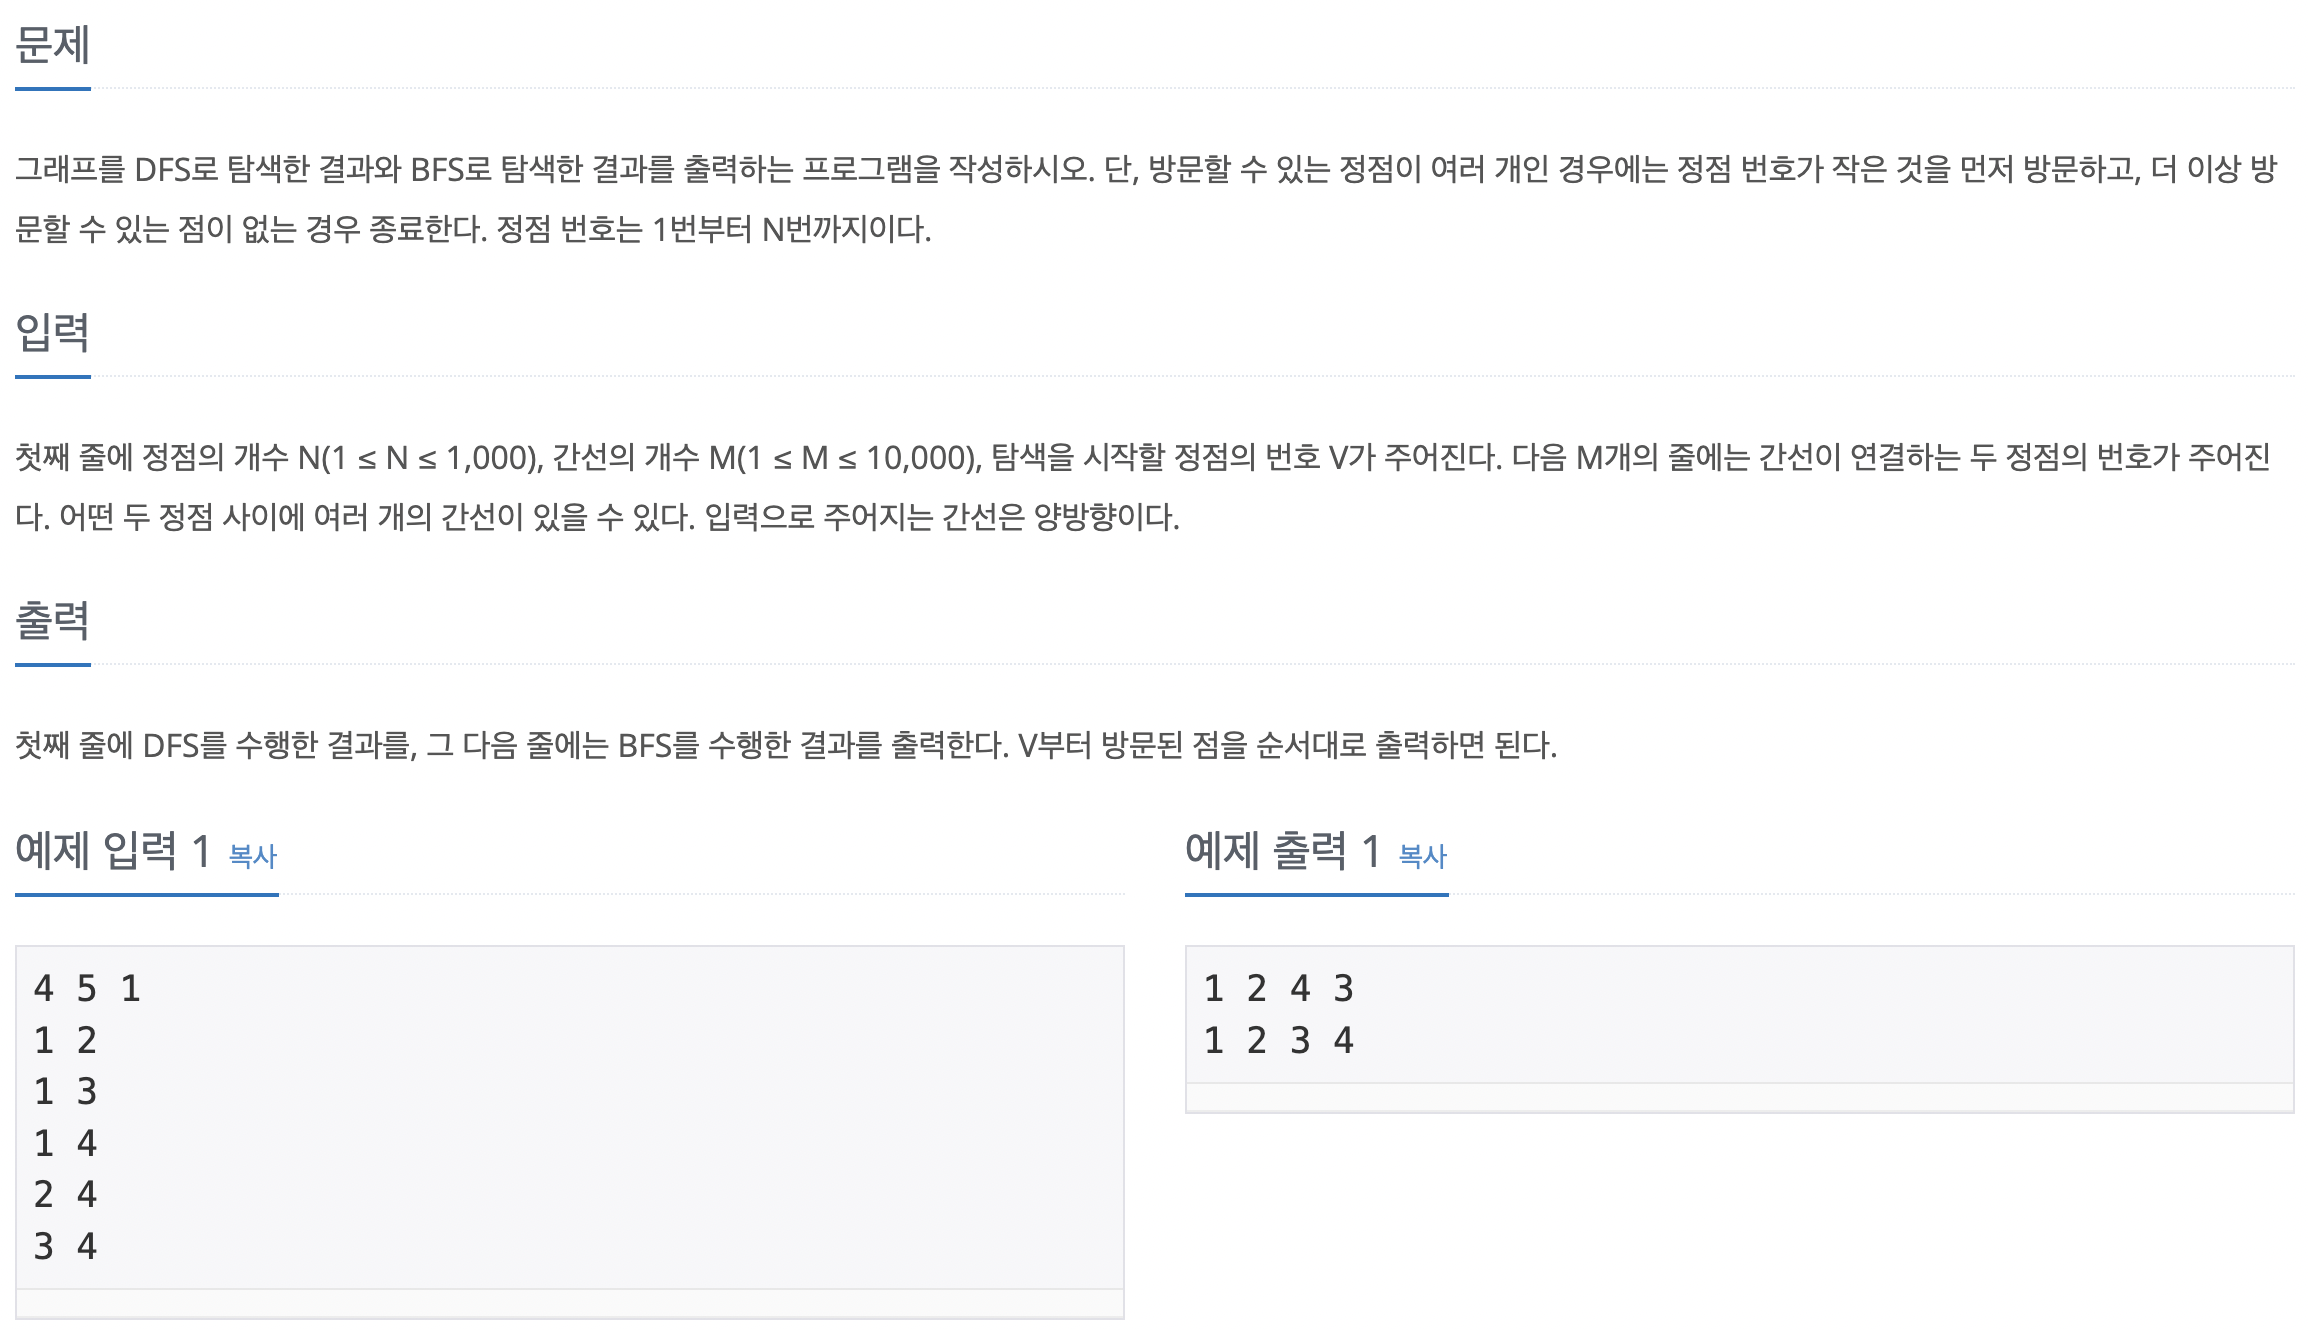

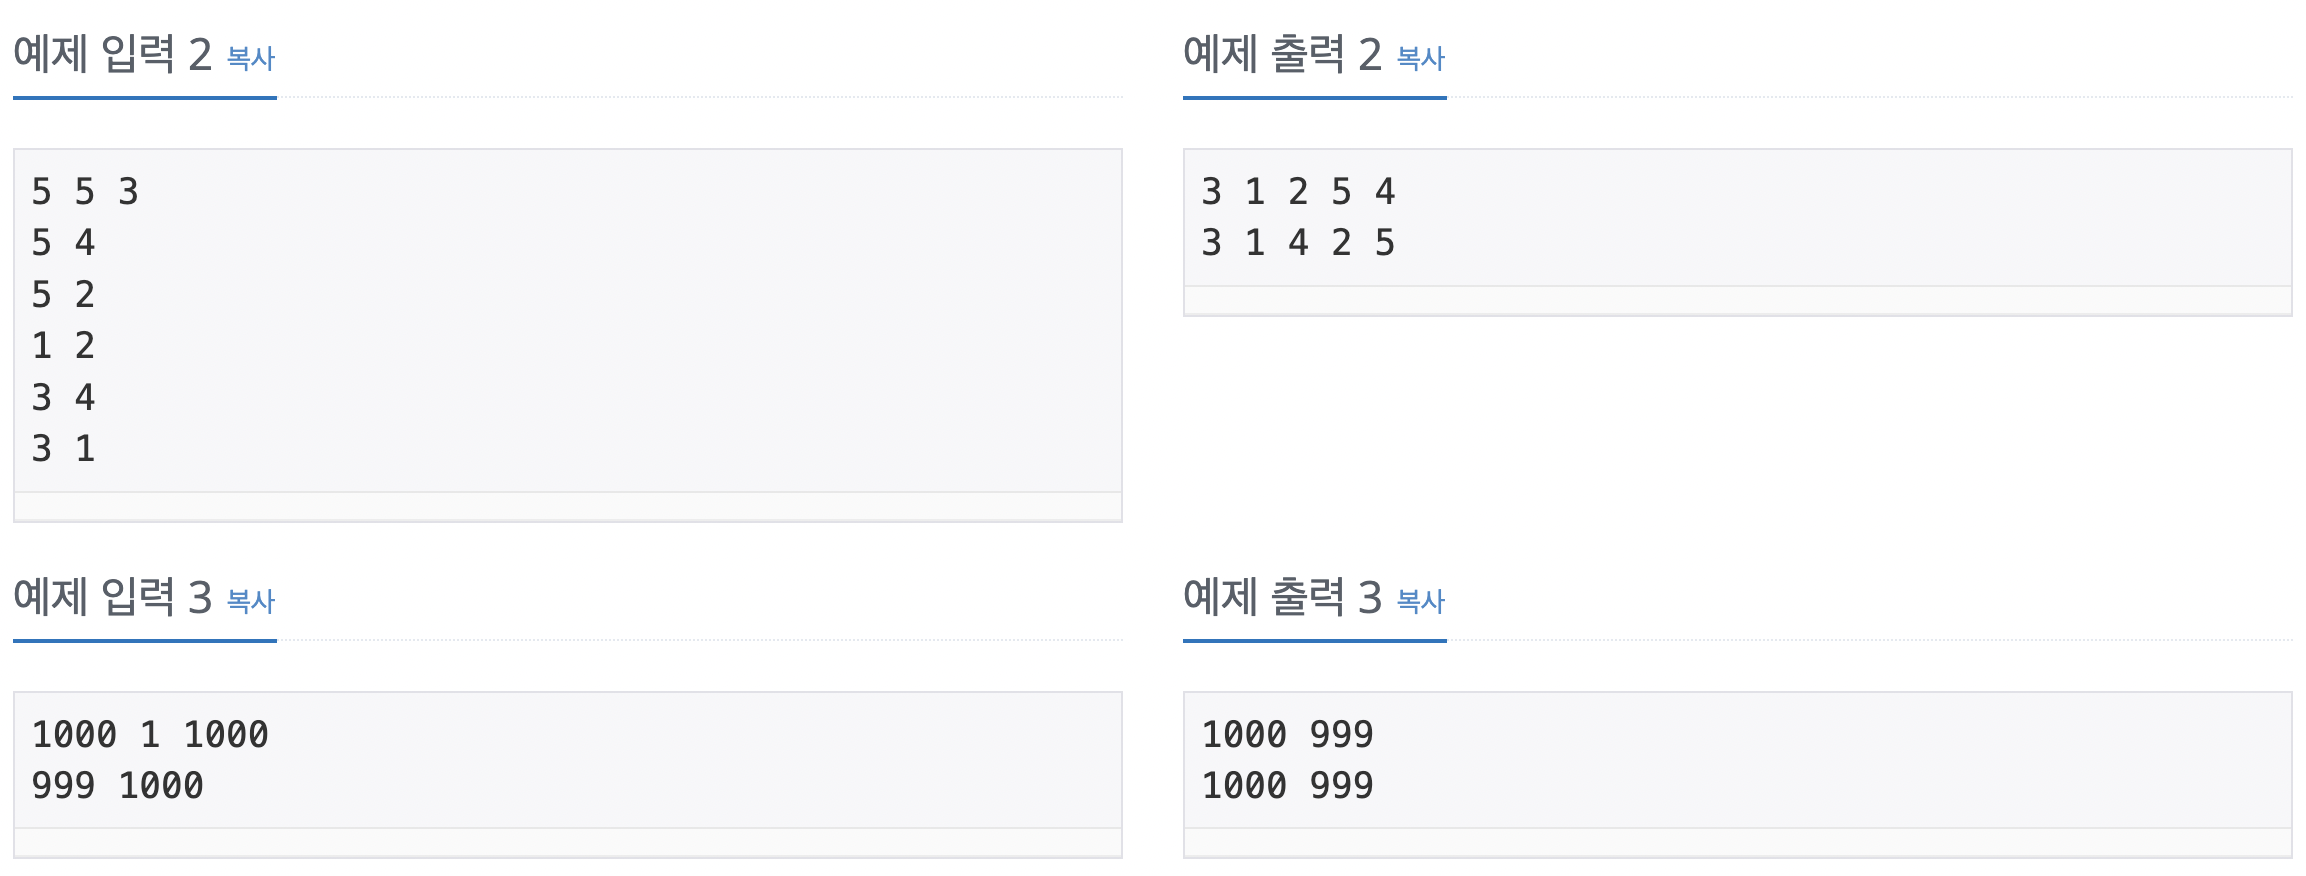

- 왜 틀렸는지 모르겠다...

In [170]:
from collections import deque

N,M,V = map(int, input().split())

node = [[0,0]]
for _ in range(M):
    a,b = map(int,input().split())
    node.append([a,b])

node.sort(key = lambda x:(x[0], x[1]))

visit = [False] * (N+1)
visit[0] = True

def dfs(node, start, visit):
    queue = deque([start])
    visit[start] = True
    
    print(start, end = " ")
    for each in node:
        if start in each:
            for p in each:
                if visit[p] == False:
                    dfs(node, p, visit)

def bfs(node, start, visit):
    queue = deque([start])
    visit[start] = True
    
    while queue:
        v = queue.popleft()
        print(v, end = " ")
        for each in node:
            if v in each:
                for p in each:
                    if visit[p] == False:
                        queue.append(p)
                        visit[p] = True
                        
                        
dfs(node, V, visit)
print("")
visit = [False] * (N+1)
visit[0] = True
bfs(node, V, visit)

8 9 1
1 2
1 3
1 8
2 7
3 4
3 5
4 5
6 7
7 8
1 2 7 6 8 3 4 5 
1 2 3 8 7 4 5 6 

- 노드 입력할 때 조금 더 간편하게 표현하기

In [175]:
from collections import deque

N,M,V = map(int, input().split())

graph = [[] for _ in range(N+1)]
for _ in range(M):
    a,b = map(int,input().split())
    graph[a].append(b)
    graph[b].append(a)

for i in range(N+1):
    graph[i].sort()

visit = [False] * (N+1)

def dfs(n):
    visit[n] = True
    print(n, end = " ")
    for i in graph[n]:
        if not visit[i]:
            dfs(i)
            
def bfs(n):
    queue = deque([n])
    visit[n] = True
    
    while queue:
        v = queue.popleft()
        print(v, end = " ")
        for i in graph[v]:
            if not visit[i]:
                queue.append(i)
                visit[i] = True


dfs(V)
print("")
visit = [False] * (N+1)
visit[0] = True
bfs(V)

8 9 1
1 2
1 3
1 8
2 7
3 4
3 5
4 5
6 7
7 8
1 2 7 6 8 3 4 5 
1 2 3 8 7 4 5 6 

# 문제 2
- 보물섬
- https://www.acmicpc.net/problem/2589

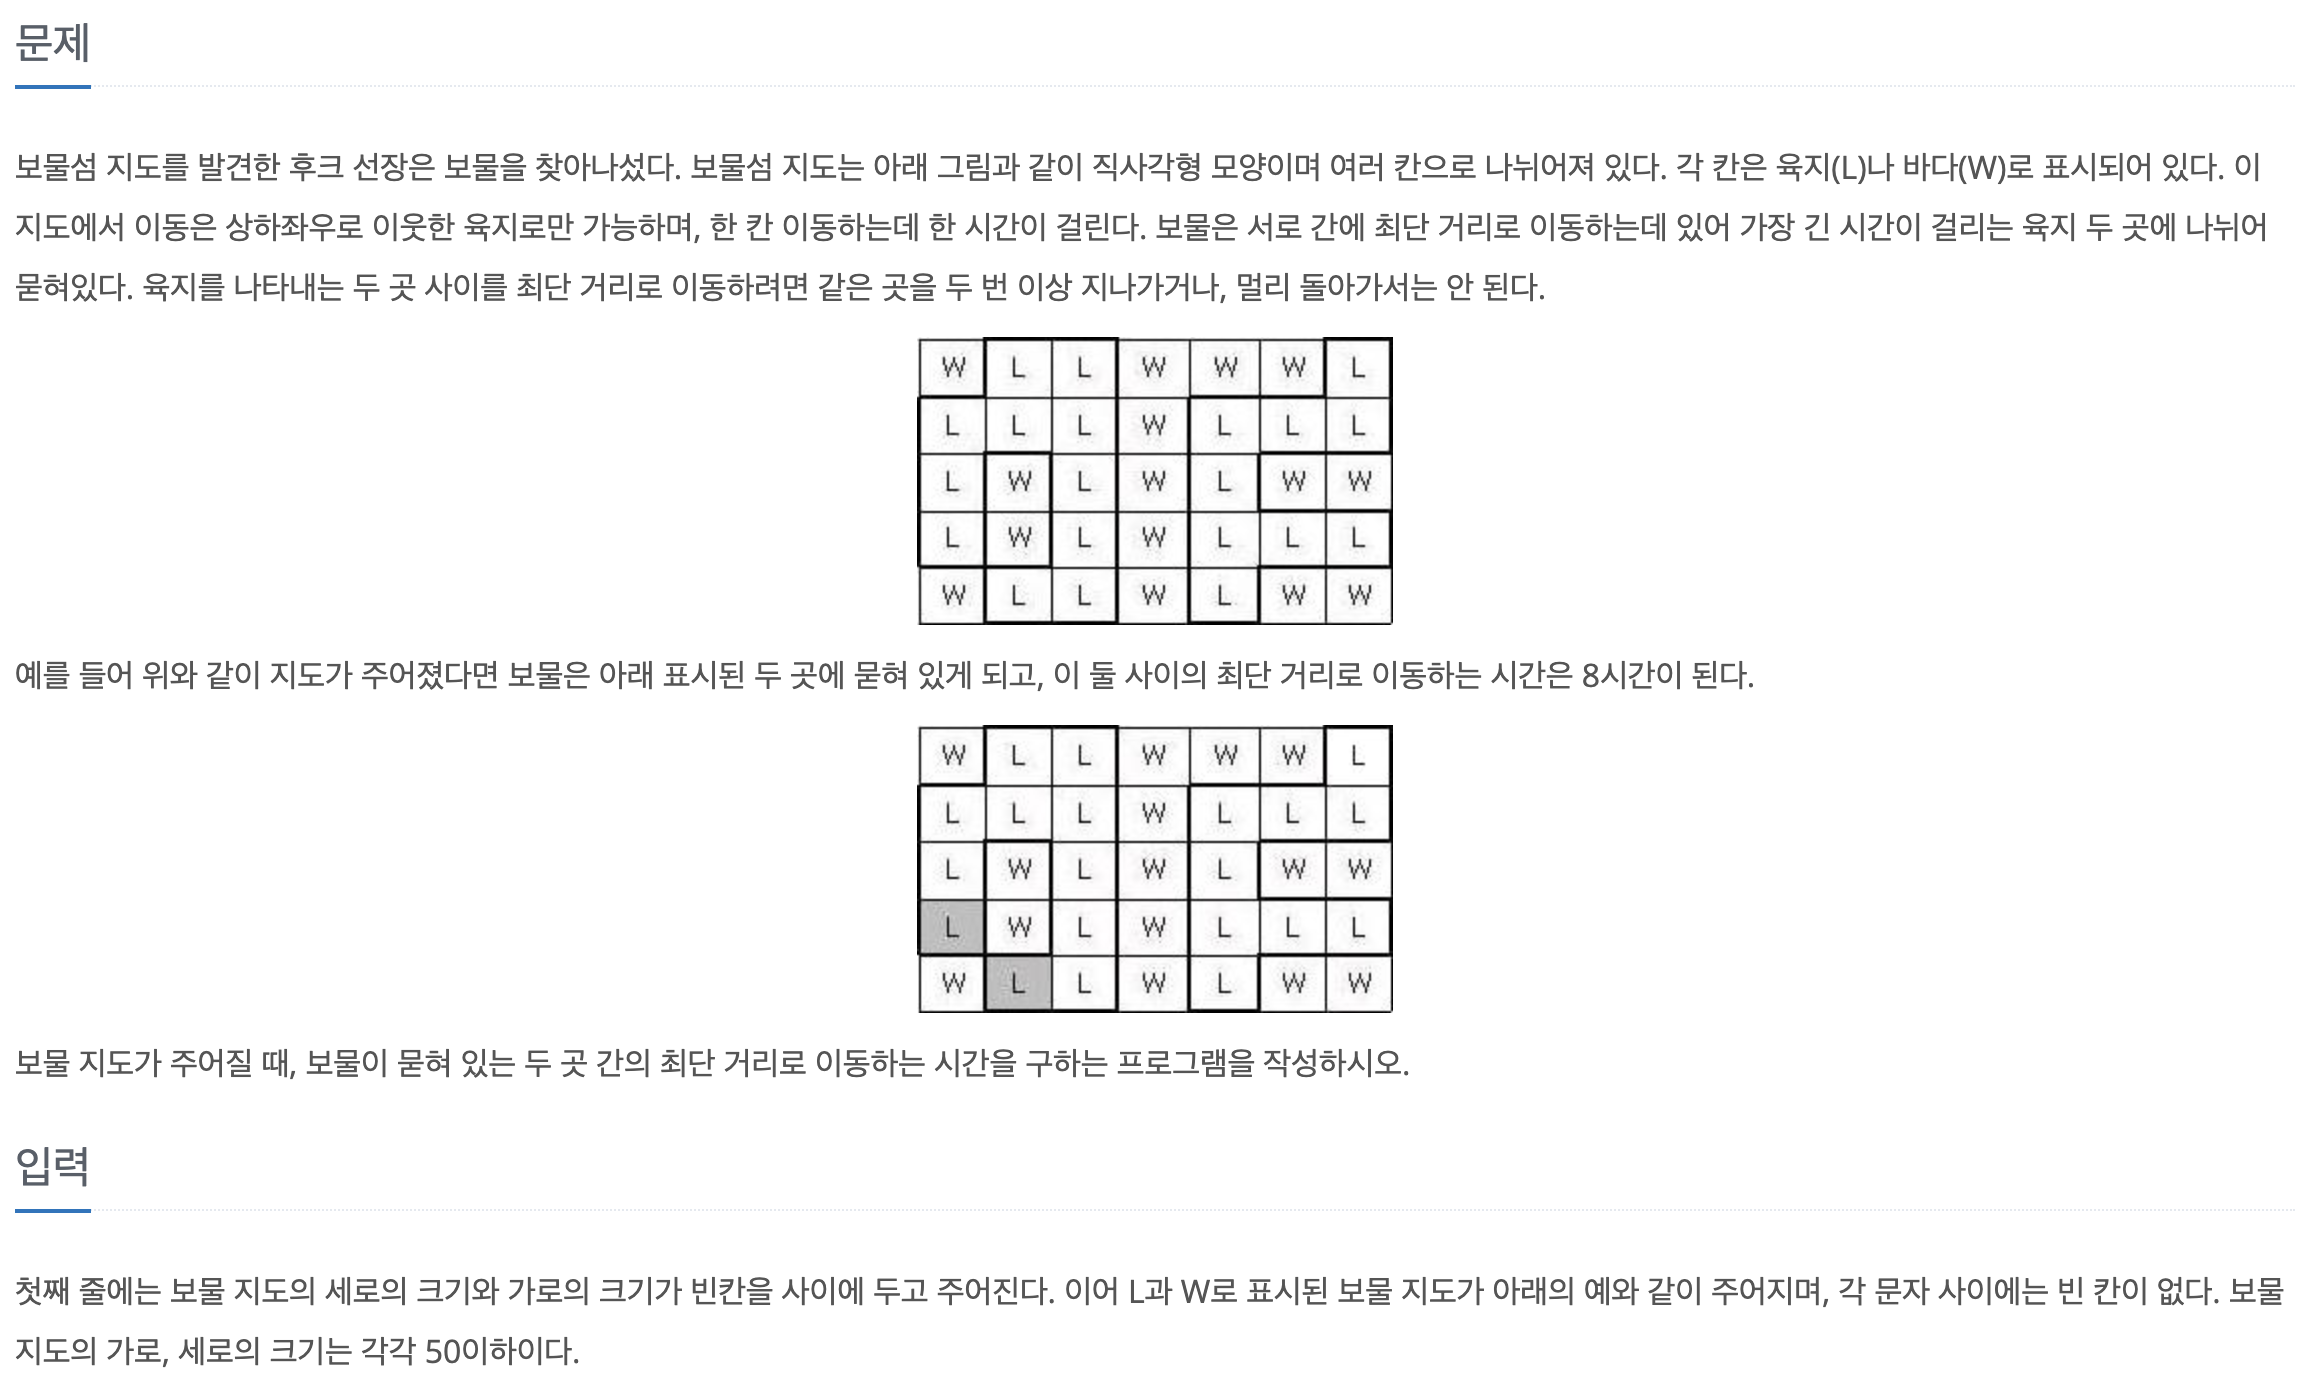

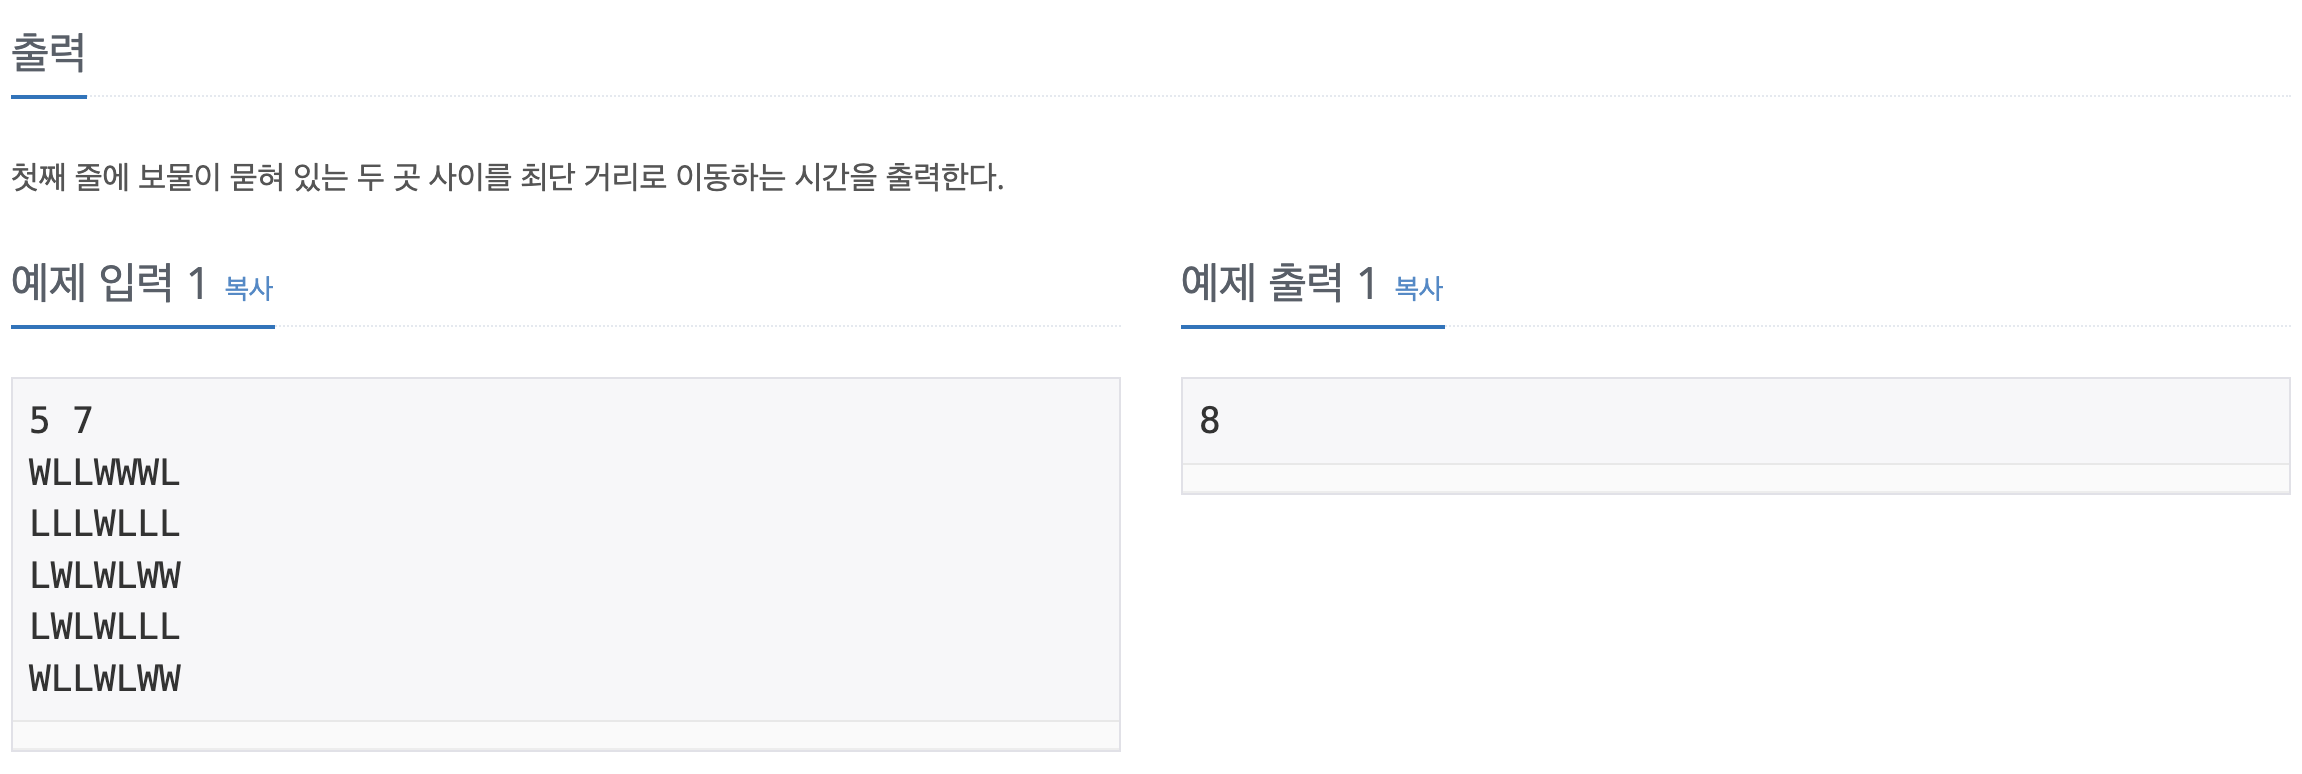

In [176]:
N,M = map(int, input().split())

5 7


In [192]:
origin_map = []
for _ in range(N):
    string = input()
    tmp = []
    for c in string:
        if c == 'W':
            tmp.append(0)
        else:
            tmp.append(1)
    origin_map.append(tmp)            

WLLWWWL
LLLWLLL
LWLWLWW
LWLWLLL
WLLWLWW


In [193]:
origin_map

[[0, 1, 1, 0, 0, 0, 1],
 [1, 1, 1, 0, 1, 1, 1],
 [1, 0, 1, 0, 1, 0, 0],
 [1, 0, 1, 0, 1, 1, 1],
 [0, 1, 1, 0, 1, 0, 0]]

In [183]:
dx = [-1,1,0,0]
dy = [0,0,-1,1]

In [216]:
from collections import deque

def bfs(x,y):
    queue = deque()
    init_x, init_y = x,y              # 추가하지 않았을 때 통과 되지 않던 부분
    queue.append((x,y))
    
    # board 초기화 단계
    board = [origin_map[i][:] for i in range(N)]
    
    while queue:
        x,y = queue.popleft()
        for i in range(4):
            nx = x + dx[i]
            ny = y + dy[i]
            
            if nx < 0 or nx >= N or ny < 0 or ny >= M:
                continue
            
            if board[nx][ny] == 0:
                continue
                
            if board[nx][ny] == 1:
                board[nx][ny] = board[x][y] + 1
                queue.append((nx,ny))
    
    board[init_x][init_y] = 1         # 추가하지 않았을 때 통과 되지 않던 부분
    print(board)
    
    max_distance = 0
    for each in board:
        if max(each) > max_distance:
            max_distance = max(each)
    max_distance -= 1
    
    return max_distance

In [220]:
bfs(0,1)

[[0, 1, 2, 0, 0, 0, 1], [3, 2, 3, 0, 1, 1, 1], [4, 0, 4, 0, 1, 0, 0], [5, 0, 5, 0, 1, 1, 1], [0, 7, 6, 0, 1, 0, 0]]


6

In [210]:
ans = 0
for i in range(N):
    for j in range(M):
        if origin_map[i][j] == 1:
            tmp = bfs(i,j)
            ans = max(tmp,ans)
            
print(ans)

8


- 제출 코드

In [221]:
from collections import deque

N,M = map(int, input().split())

origin_map = []
for _ in range(N):
    string = input()
    tmp = []
    for c in string:
        if c == 'W':
            tmp.append(0)
        else:
            tmp.append(1)
    origin_map.append(tmp)

dx = [-1,1,0,0]
dy = [0,0,-1,1]

def bfs(x,y):
    queue = deque()
    queue.append((x,y))
    init_x, init_y = x,y
    # board 초기화 단계
    board = [origin_map[i][:] for i in range(N)]
    
    while queue:
        x,y = queue.popleft()
        for i in range(4):
            nx = x + dx[i]
            ny = y + dy[i]
            
            if nx < 0 or nx >= N or ny < 0 or ny >= M:
                continue
            
            if board[nx][ny] == 0:
                continue
                
            if board[nx][ny] == 1:
                board[nx][ny] = board[x][y] + 1
                queue.append((nx,ny))
                
    board[init_x][init_y] = 1
    max_distance = 0
    for each in board:
        if max(each) > max_distance:
            max_distance = max(each)
    max_distance -= 1
    
    return max_distance

ans = 1
# dist_list = []
for i in range(N):
    for j in range(M):
        if origin_map[i][j] == 1:
            tmp = bfs(i,j)
#             dist_list.append(tmp)
            ans = max(tmp,ans)

print(ans)

5 7
WLLWWWL
LLLWLLL
LWLWLWW
LWLWLLL
WLLWLWW
[6, 5, 7, 6, 5, 4, 4, 5, 6, 7, 5, 4, 8, 6, 5, 6, 7, 8, 7, 6]
8


# 문제 3
- 영역구하기
- https://www.acmicpc.net/problem/2583

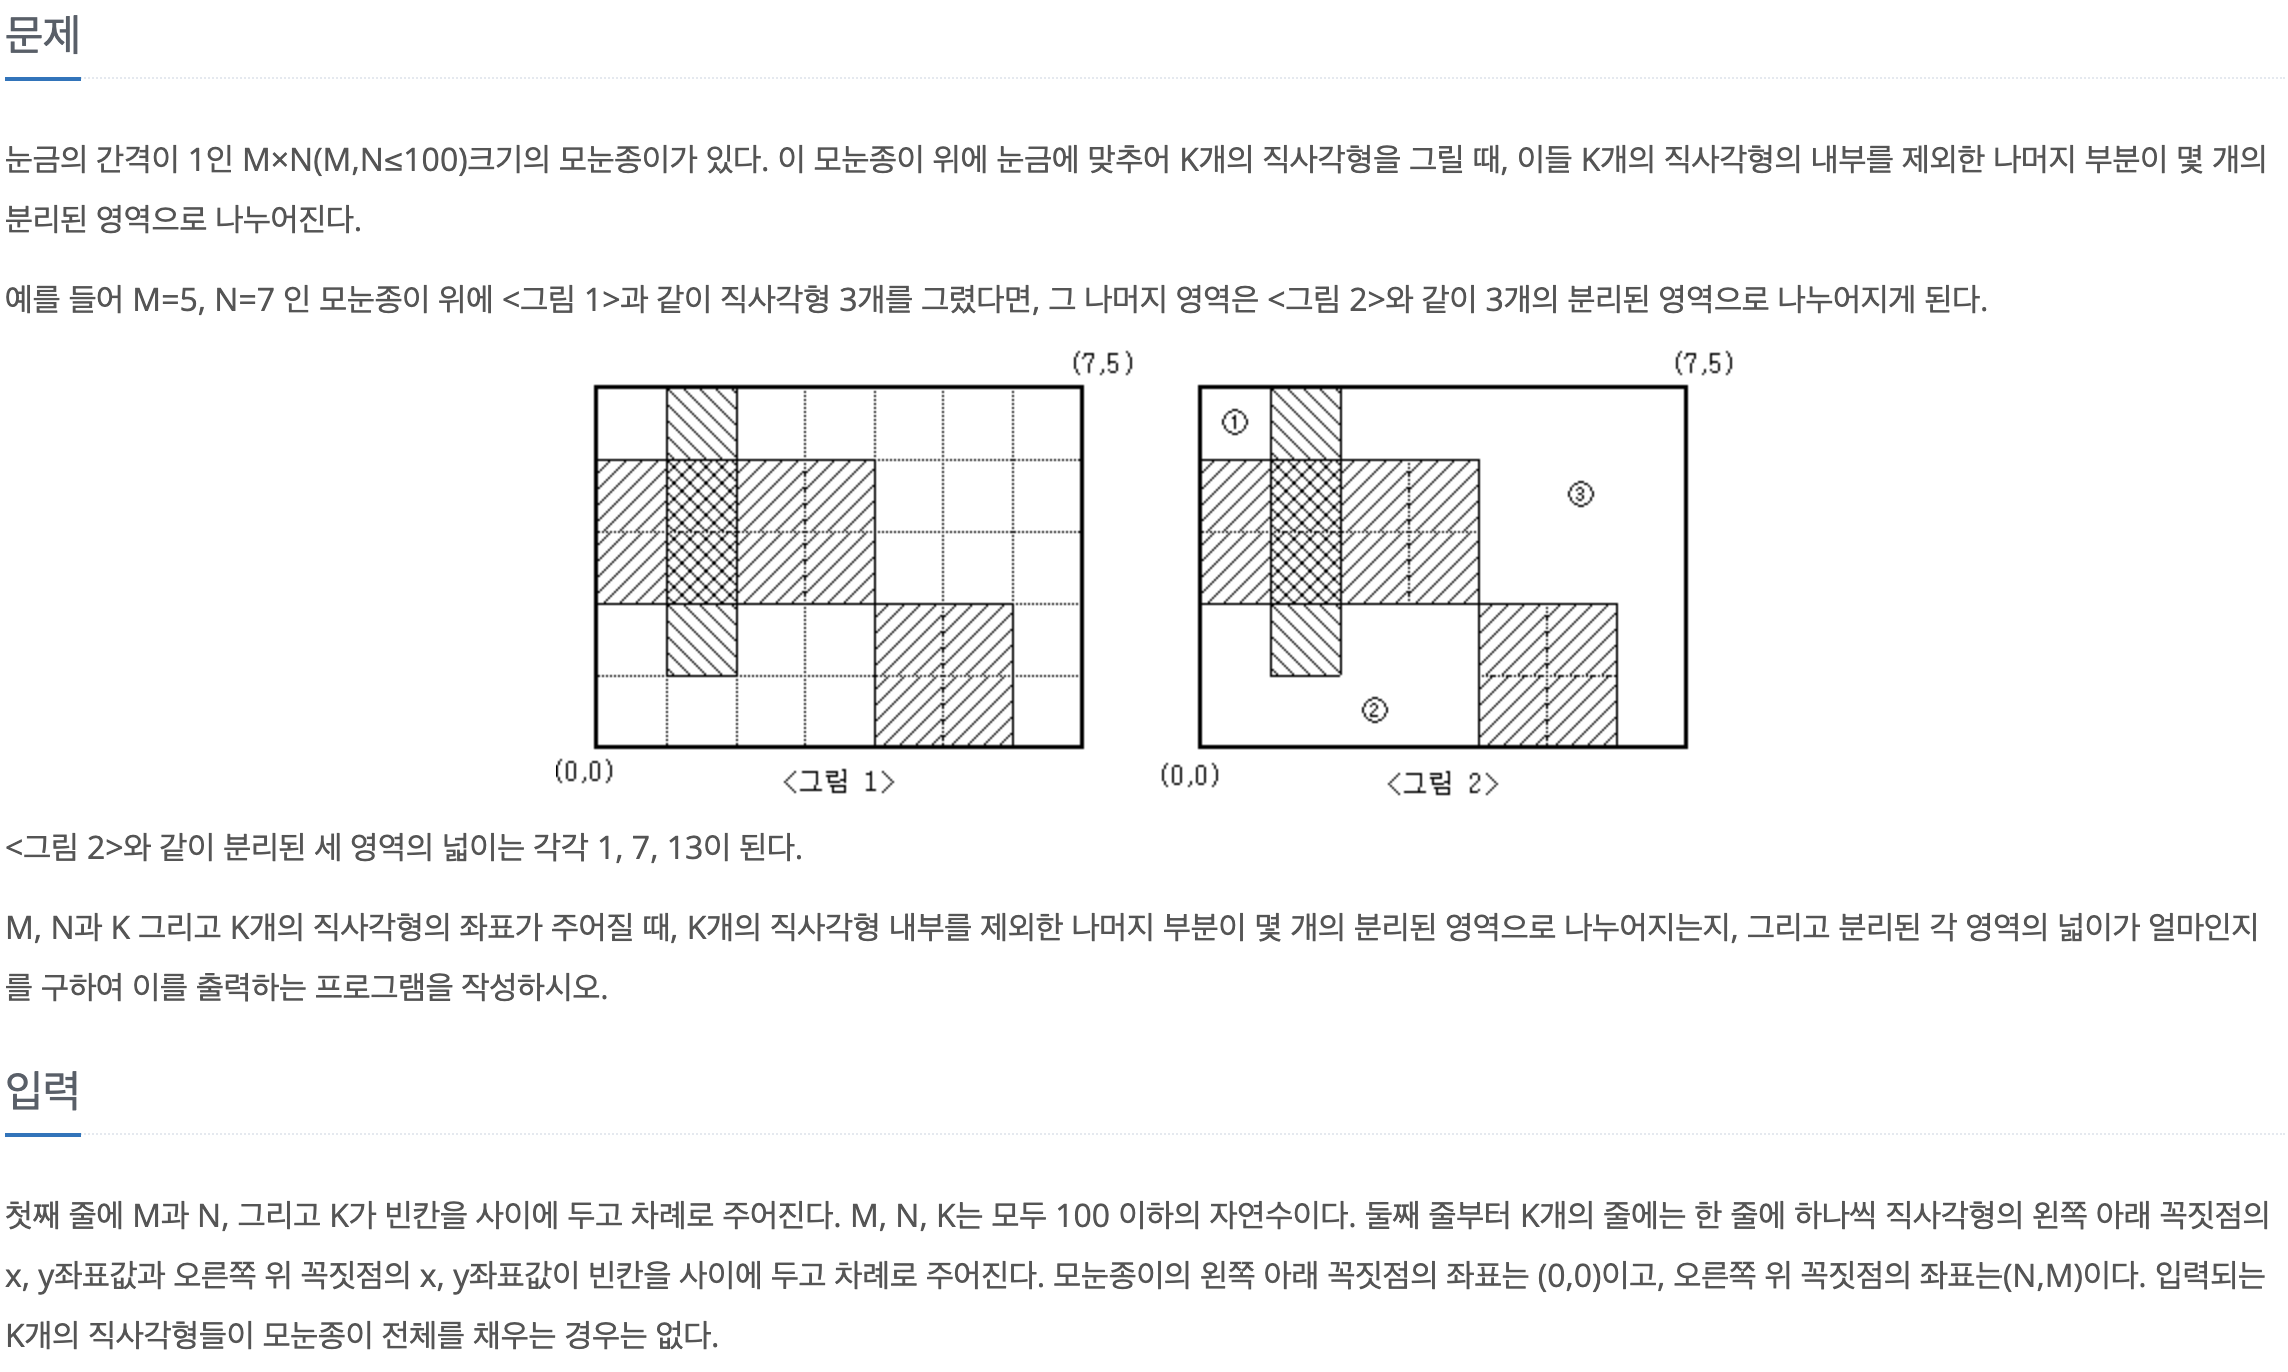

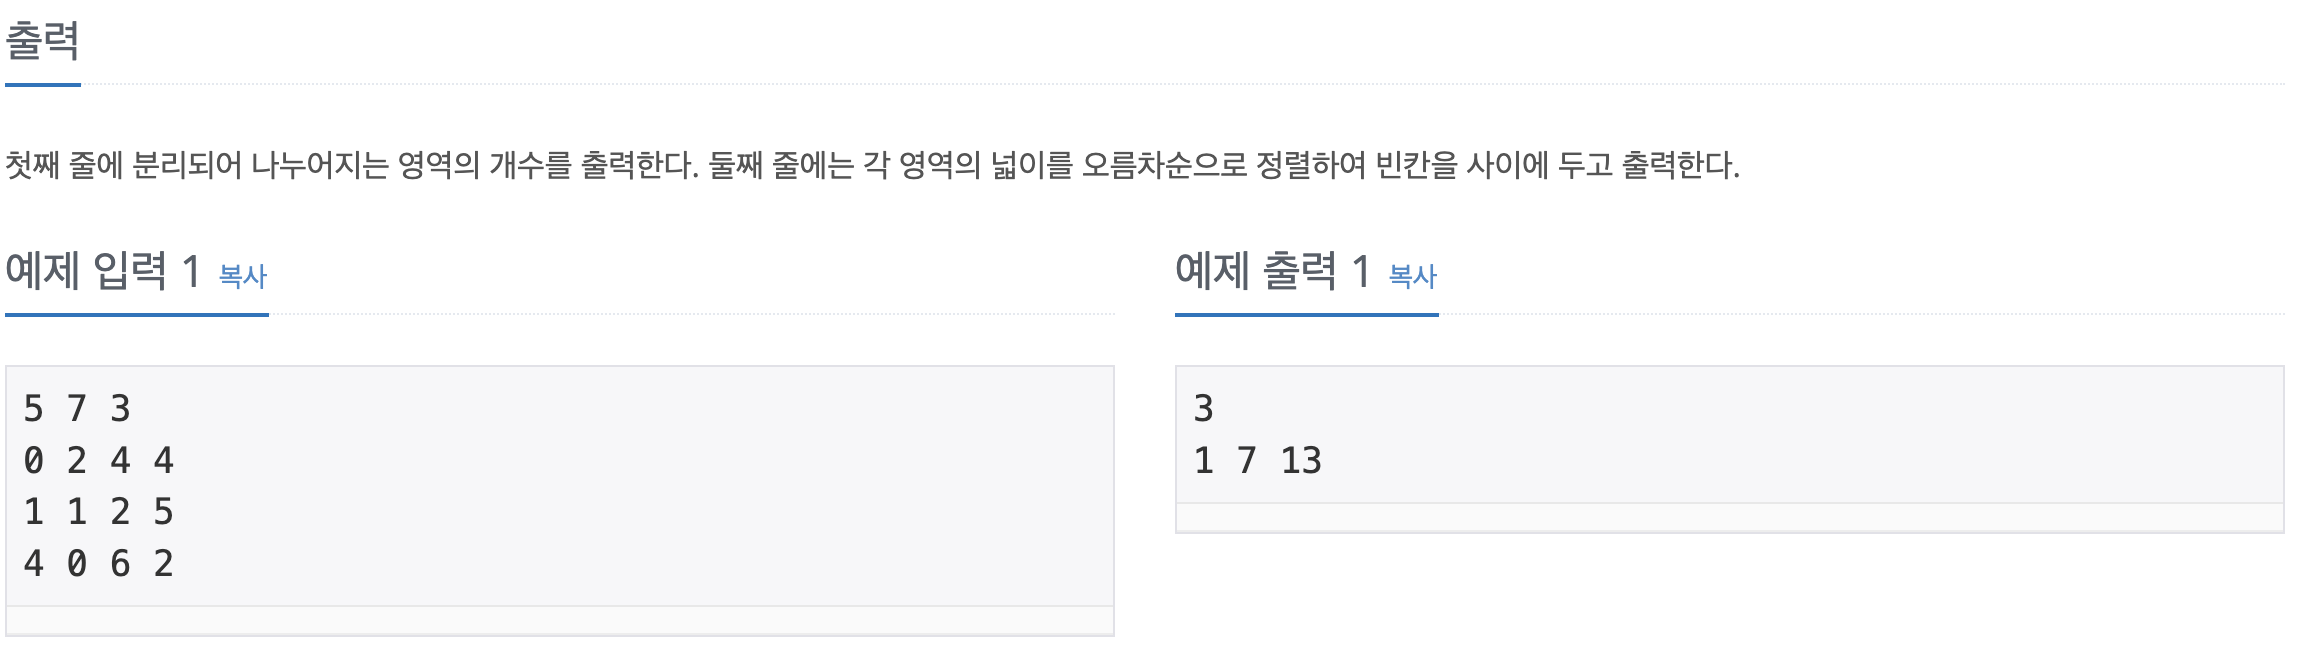

- 사각형 채우는게 좀 까다로울듯?
- 왼쪽아래가 (0,0)으로 시작하기 때문에, 모눈의 꼭지점을 기준으로 세기 때문에
- 그냥 위아래 뒤집에서 그릴까? (영역넓이를 오름차순으로 정렬해서 출력하니까 상관 없을 것 같다)

In [296]:
def dfs(y, x, cnt):
    graph[y][x] = 1
    for dy, dx in d:
        Y, X = y+dy, x+dx
        if (0 <= Y < M) and (0 <= X < N) and graph[Y][X] == 0:
            cnt = dfs(Y, X, cnt+1)
    return cnt
    
M, N, K = map(int, input().split())
graph = [[0]*N for _ in range(M)]
for _ in range(K):
    x1, y1, x2, y2 = map(int, input().split())
    for i in range(y1, y2):
        for j in range(x1, x2):
            graph[i][j] = 1
d = [(-1, 0), (1, 0), (0, -1), (0, 1)]
res = []
for i in range(M):
    for j in range(N):
        if graph[i][j] == 0:
            res.append(dfs(i, j, 1))
print(len(res))
print(*sorted(res))

5 7 3
0 2 4 4
1 1 2 5
4 0 6 2
3
1 7 13


In [297]:
import sys
sys.setrecursionlimit(10**6)
M,N,K = map(int,input().split())

board = [[0]*N for _ in range(M)]

for _ in range(K):
    s_x, s_y, e_x, e_y = map(int, input().split()) #start_x, end_x
    #0 ,  2 ,  4 ,  4
    for j in range(s_x, e_x):
        for i in range(s_y, e_y):
            board[i][j] = 1
            
def dfs(x,y):
    if x < 0 or x >= M or y < 0 or y >= N:
        return False
    global cnt
    check = []
    
    if board[x][y] == 0:
        board[x][y] = 1
        cnt += 1
        check.append((x,y))
        dfs(x-1,y)
        dfs(x+1,y)
        dfs(x,y-1)
        dfs(x,y+1)
    
        return cnt
    return False

ans = []
for i in range(M):
    for j in range(N):
        if board[i][j] == 0:
            cnt = 0
            area = dfs(i,j)
            if area:          # dfs 결과가 False가 아닌 숫자라면
                ans.append(area)
ans.sort()
print(len(ans))
for a in ans:
    print(a, end = " ")

5 7 3
0 2 4 4
1 1 2 5
4 0 6 2
3
1 7 13 

In [ ]:
M,N,K = map(int,input().split())

board = [[0]*N for _ in range(M)]

for _ in range(K):
    s_x, s_y, e_x, e_y = map(int, input().split()) #start_x, end_x
    #0 ,  2 ,  4 ,  4
    for j in range(s_x, e_x):
        for i in range(s_y, e_y):
            board[i][j] = 1

In [293]:
board

[[0, 0, 0, 0, 1, 1, 0],
 [0, 1, 0, 0, 1, 1, 0],
 [1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1],
 [0, 1, 0, 0, 0, 0, 0]]

In [281]:
def dfs(x,y):
    if x < 0 or x >= M or y < 0 or y >= N:
        return False
    global cnt
    check = []
    
    if board[x][y] == 0:
        board[x][y] = 1
        cnt += 1
        check.append((x,y))
        dfs(x-1,y)
        dfs(x+1,y)
        dfs(x,y-1)
        dfs(x,y+1)
    
        return cnt
    return False